# Portfolio Optimization


## Modern Portfolio Theory

Modern portfolio theory also popularly called `Mean-Variance Portfolio Theory (MVP)` is a major breakthrough in finance. It is based on the premise that returns are normally distributed and by looking at mean and variance, we can essentially describe the distribution of end-of-period wealth.

The basic idea of this theory is to achieve diversification by constructing a portfolio for a minimal portfolio risk or maximal portfolio returns. Accordingly, the Efficient Frontier is a set of optimal portfolios in the risk-return spectrum, and portfolios located under the Efficient Frontier curve are considered sub-optimal.

This means that the portfolios on the frontier offered

Highest expected return for a given level of risk

Lowest level of risk for a given level of expected returns

In essence, the investors' goal should be to select a level of risk that he/she is comfortable with and then find a portfolio that maximizes returns based on the selected risk level.

## Formulation of an optimisation problem

Optimization problems can be defined as 
$$ \min\limits_{x_1,..., x_n} f(x_1,..., x_n) $$

subject to
\begin{aligned}
g_1(x_1, \dots, x_n) &=or>or< b_1 \\
&\vdots \\
g_m(x_1, \dots, x_n) &=or>or< b_m
\end{aligned}

F is the Objective Function, then $ x_1, \dots, x_n $ are the decision variables, finaly the function $ g_1, \dots, g_n $ are the m constrants, these constraints can be equalities or inequalities


## Unconstrained optimization

In the absence of any constraint, our system looks like:
$$ \min\limits_{x_1,..., x_n} f(x_1,..., x_n) $$

which can be resolved though regular multivariate calculus:

- (H1): The gradient of f at x* as to be zero (necessary condition)
- (H2): The Hessian of f at x* as to be positive definite (sufficient condition)

H1 is used to find the set of potential solution and H2 is used to verify if these solution work

We write $
\nabla f(x) = \begin{bmatrix} 
\frac{\partial f}{\partial x_1} \\ 
\frac{\partial f}{\partial x_2} \\ 
\vdots \\ 
\frac{\partial f}{\partial x_n} 
\end{bmatrix}
$ and $
H_f(x) = \begin{bmatrix} 
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \dots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\ 
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \dots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \dots & \frac{\partial^2 f}{\partial x_n^2} 
\end{bmatrix}
$

M is positive definite if and only if $x^T M x > 0$.





### Aplication 1 - The mean-variance optimization criterion:

#### Mathematical explanation:

We are in an economy with n different assets, each characterized by its expected return $\mu_i$ and expected standard deviation $\sigma_i$. Moreover all asset can be correlated so we define $\rho_{ij}$ as the correlation between asset i and j. The proportion of the portfolio invested in asset i is $w_i$

thus we have $\mu = \begin{bmatrix} 
\ \mu_i\\ 
\vdots \\ 
\ \mu_i 
\end{bmatrix}$ and $w = \begin{bmatrix} 
\ w_i\\ 
\vdots \\ 
\ w_i 
\end{bmatrix}$ and $
\Sigma =
\begin{bmatrix}
\sigma_1^2 & \rho_{12} \sigma_1 \sigma_2 & \dots & \rho_{1n} \sigma_1 \sigma_n \\
\rho_{21} \sigma_2 \sigma_1 & \sigma_2^2 & \dots & \rho_{2n} \sigma_2 \sigma_n \\
\vdots & \vdots & \ddots & \vdots \\
\rho_{n1} \sigma_n \sigma_1 & \rho_{n2} \sigma_n \sigma_2 & \dots & \sigma_n^2
\end{bmatrix}
$

Therefore, the portfolio return $\mu_{\pi} = \mu^Tw$ and $\sigma_{\pi}^2=w^T\Sigma w$



The mean-variance optimization criterion proposed by Markowitz corresponds to finding the asset allocation w that maximizes the exepected return of the portfolio subject to a penalty related to the variance of portfolio returns (thanks to $\lambda$ with $\lambda = 1$ being the kelly portfolio):

$$\max\limits_{w}(\mu_{\pi} - \frac{\lambda}{2}\sigma_{\pi}^2)$$


$\lambda>0$ represent the risk-aversion

To solve the mean-variance problem we need to write the equation as an explicit function of w.

First, let's write $\mu_{\pi}$: 
We will just add that we consider that we have a risk-free asset (bank account) with a certain constant return r. It thus has a variance of 0 and a correlation to the other risky asset equal to 0. The weight of risk-free asset is defined as:
$$w_0=1-w^T\mathbf{1}$$
Thus the expected return of the portfolio is given by:
$$\mu_{\pi}=w^T\mu + r(1-w^T\mathbf{1})$$
$\sigma_{\pi}$ doesn't change as the risk-free asset has a variance of 0

$$\max\limits_{w}(\mu_{\pi} - \frac{\lambda}{2}\sigma_{\pi}^2)= \max\limits_{w} V(w) =[r + w^T(\mu - r\mathbf{1})] - \frac{\lambda}{2}w^T\Sigma w$$


Multivariate calculus gives us that 
$$\frac{d}{dw} (w^T\Sigma w) = 2\Sigma w$$

Thus $\nabla V(w^*) = 0$ gives us this potential solution:

$$w^* = \frac{1}{\lambda}\Sigma^{-1}(\mu - r\mathbf{1})$$

We then have to check the Hessian or:

$$H_V(w^*)=-\lambda\Sigma<0$$

As $\Sigma$ is positive definite we can confirm that $w^*$ is a maximum

#### Python Explanation:

Let's set the weights

In [1]:
import numpy as np

n_assets = 19 + 1  # 19 stocks + 1 risk-free
initial_weights = np.full(n_assets, 1/n_assets)  # Each gets 1/20

Now we will retrieve the data of 19 stock:

In [2]:
import pandas as pd
from quantmod.markets import getData, getTicker

# List of 19 stock tickers
tickers = [
    'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META',
    'TSLA', 'JNJ', 'V', 'WMT',
    'JPM', 'PG', 'NVDA', 'DIS', 'MA',
    'HD', 'PYPL', 'BAC', 'XOM', 'INTC'
]

In [3]:
# Dictionary to store results
expected_returns = {}
returns_data = {}


In [4]:
# Retrieve data and compute metrics
for ticker in tickers:
    df = getData(ticker, period='50d')  # Get last month and plus’s  data
    df['Return'] = df['Close'].pct_change()  # Compute daily returns
        
    # Store daily returns for covariance computation
    returns_data[ticker] = df['Return'].dropna()

    # Compute expected return (mean daily return annualized)
    mu = df['Return'].mean() * 252
    expected_returns[ticker] = mu
    

# Convert daily return data into a DataFrame
returns_df = pd.DataFrame(returns_data)

# Compute the covariance matrix of daily returns
cov_matrix = returns_df.cov()  # Daily covariance matrix
cov_matrix_annualized = cov_matrix * 252  # Multiply by 252 to get yearly covariance


Calculate $w^*$:

In [5]:
# Define the risk-free rate (example: 3% annually)
risk_free_rate = 0.03  

# Convert expected returns into NumPy array
mu_vector = np.array(list(expected_returns.values()))  # Expected returns vector

# Construct 1-vector
ones_vector = np.ones(len(mu_vector))

# Set risk aversion parameter (lambda)
lambda_param = 1  # Set to 1 for Kelly portfolio

# Compute inverse of the covariance matrix
Sigma_inv = np.linalg.inv(cov_matrix_annualized)  # Compute Σ⁻¹

# Compute optimal weights (only for risky assets)
w_optimal = (1 / lambda_param) * Sigma_inv @ (mu_vector - risk_free_rate * ones_vector)

# Compute weight of the risk-free asset
w_risk_free = 1 - np.sum(w_optimal)



Display weight changes:

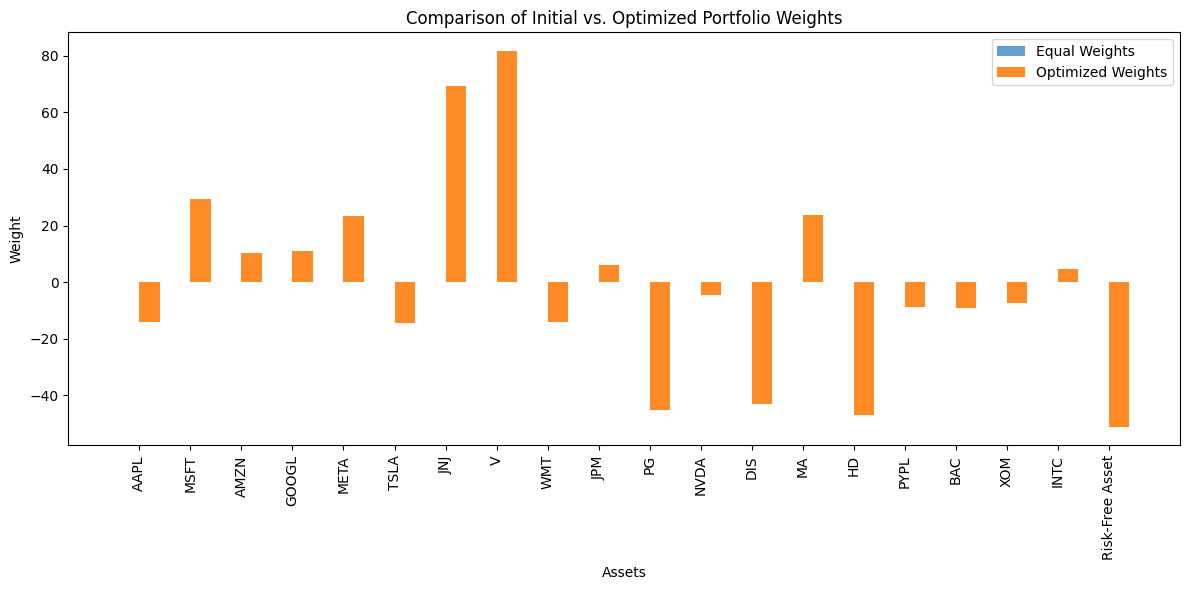

In [6]:
import matplotlib.pyplot as plt



# Define initial equal weights (including risk-free asset)
equal_weights = np.full(len(w_optimal) + 1, 1 / (len(w_optimal) + 1))  

# Create a DataFrame for comparison
weights_comparison_df = pd.DataFrame({
    "Asset": list(expected_returns.keys()) + ["Risk-Free Asset"],
    "Initial Equal Weight": equal_weights,
    "Optimal Weight": np.append(w_optimal, w_risk_free)
})

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(weights_comparison_df))

ax.bar(index - bar_width/2, weights_comparison_df["Initial Equal Weight"], bar_width, label="Equal Weights", alpha=0.7)
ax.bar(index + bar_width/2, weights_comparison_df["Optimal Weight"], bar_width, label="Optimized Weights", alpha=0.9)

# Formatting the graph
ax.set_xlabel("Assets")
ax.set_ylabel("Weight")
ax.set_title("Comparison of Initial vs. Optimized Portfolio Weights")
ax.set_xticks(index)
ax.set_xticklabels(weights_comparison_df["Asset"], rotation=90)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

##### Analysis of the Portfolio Weight Change Graph
From the bar chart, we can observe the following key takeaways:

Optimized Weights Are Highly Uneven:
- Some assets have significantly higher allocations (e.g., JNJ, V, MA).
- Other assets have negative weights, indicating short positions (e.g., AAPL, PG, Risk-Free Asset).

Risk-Free Asset Has a Large Negative Allocation:
- This suggests that the optimal portfolio is leveraging (borrowing at the risk-free rate to invest more in stocks).


### Aplication 2 - Ordinary Least Squares Linear Regression


The Capital Asset Pricing Model (CAPM) is a fundamental result in finance theory: It is the idea that the ecpected risk premium of any asset should be proportional to the expected risk premium of the underlying market.

Expected risk premium: the additional return that investors demand for holding a risky asset instead of a risk-free asset $\mathbb{E}[R^A] - r$ with r being the risk free rate and $R^A$ being the return of asset A.

Then CAPM would give that: 
$$\mathbb{E}[R^A- r]  = \beta \mathbb{E}[R^M- r] $$

$\beta$ is the degree of exposure to systematic risk, which means how much a portfolio asset is affected by overall market risk. More precisely systematic risk is a market wide risk that cannot be eliminated by diversification. However $\beta$ is unknown, we need to estimate it based on historical data. Generally it is estimated with OLS linear regression.

The CAPM is more commonly written as:
$$\mathbb{E}[R^A]  = r + \beta \mathbb{E}[R^M- r] $$

Expectation is good to look in the future but definitely not adapted to historical analysis to find $\beta$. We thus need to go back to Sharpe's linar factor model were historical data is adapted:

$$R_i^A-r= \beta(R_i^M-r)$$

It is worth mentionning that usually r is constant but in some case it isn't (TBill or Bond rate), $\beta$ is the same for all i (i are datapoints)

We will account for measurement errors with introducing the error term $\epsilon$:

$$R_i^A-r= \beta(R_i^M-r) + \epsilon_i$$

The error term satisfy the following properties due to mathematical reasons:
- $\epsilon$ are iid  
- $\epsilon \sim \mathcal{N}(0, s^2)$ it is convenient to assume they are normal so we will it


We will note the dependent variable Y:
$$
Y = \begin{bmatrix} 
Y_1 \\ 
\vdots \\ 
Y_n
\end{bmatrix}
= \begin{bmatrix} 
R^A_1-r \\ 
\vdots \\ 
R^A_n-r
\end{bmatrix}$$
and the independent variable Y:
$$
X = \begin{bmatrix} 
X_1 \\ 
\vdots \\ 
X_n
\end{bmatrix}
= \begin{bmatrix} 
R^M_1-r \\ 
\vdots \\ 
R^M_n-r
\end{bmatrix}$$

Our model is thus: $$Y = \beta X + \epsilon$$


Now that we've introduced the problem, you may asking what does it have to do with optimization ? The core idea of OLS regresion is that we must minimize $L^2$ in order to get the best approximation of $\beta$.$L^2$ is called the loss function in statistical estamation theory and in supervised machine learning

$$ L^2 = \sum_{i=1}^{n}(Y_i-X_i\beta)^2=\sum_{i=1}^{n}\epsilon^2_i$$

Here we recognize an unconstrained optimization problem. We can also write:

$$\min\limits_{\beta} F(\beta) = (Y - X\beta)^T(Y-X\beta) = Y^TY-2\beta X^TY+ \beta^T X^TX\beta$$

(H1) implies that $\frac{\partial F}{\partial \beta} = 0$ with gives:

$$\beta_*=(X^TX)^{-1}X^TY $$

(H1) implies that $(X^TX) > 0$ allows $\beta_*$ to be a solution$


- We can check if $\beta_*$ si a good estimate random variable or not by calculating the corariance of $\beta^*$ and $\beta$
$$\mathbb{E}[(\beta-\beta^*)(\beta-\beta^*)^T] = \mathbb{E}[(X^TX)^{-1}X^T\epsilon \epsilon^TX(X^TX)^{-1}] = (X^TX)^{-1}X^T\mathbb{E}[\epsilon \epsilon^T]X(X^TX)^{-1}$$


However the error vector $\epsilon$ is random and since all elements of the vector have the same variance and are uncorrelated, the covariance matrix is simply:
$$\mathbb{E}[\epsilon \epsilon^T] = s^2 I_n$$

So we have:

$$\mathbb{E}[(\beta-\beta^*)(\beta-\beta^*)^T] = s^2(X^TX)^{-1}$$


- We can use our model to predict Y

The predicted value of Y by the model is
$$Y_* = X\beta_*$$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from quantmod.markets import getData, getTicker

In [8]:
# Define asset and market index
ticker_asset = "AAPL"  # Example stock
ticker_market = "^GSPC"  # S&P 500 as market proxy

# Fetch historical data
start_date = "2020-01-01"
end_date = "2024-01-01"

data_asset = getData((ticker_asset), start_date=start_date, end_date=end_date)
data_market = getData((ticker_market), start_date=start_date, end_date=end_date)

# Compute daily returns
data_asset["Returns"] = data_asset["Close"].pct_change()
data_market["Returns"] = data_market["Close"].pct_change()

# Merge data
merged_data = pd.merge(data_asset[["Returns"]], data_market[["Returns"]], left_index=True, right_index=True, suffixes=("_A", "_M"))
merged_data.dropna(inplace=True)

# Define risk-free rate (assuming 2% annualized, daily rate)
r = 0.02 / 252  # Convert annual risk-free rate to daily

In [9]:
# Compute excess returns
y = merged_data["Returns_A"] - r  # Y = R^A - r
x = merged_data["Returns_M"] - r  # X = R^M - r


In [10]:
# OLS estimation of beta (β*)
X = sm.add_constant(x)  # Add intercept term (constant term for regression)
model = sm.OLS(y, X).fit()
beta_hat = model.params[1]

# Compute covariance of beta estimate
sigma_squared = np.var(model.resid, ddof=1)  # Estimate of residual variance
cov_beta_hat = sigma_squared * np.linalg.inv(X.T @ X)[1, 1]

# Predict Y values
Y_pred = X @ model.params

/var/folders/9m/rnxpskm57q90my8vz9bwy32h0000gn/T/ipykernel_2723/2625074615.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_hat = model.params[1]


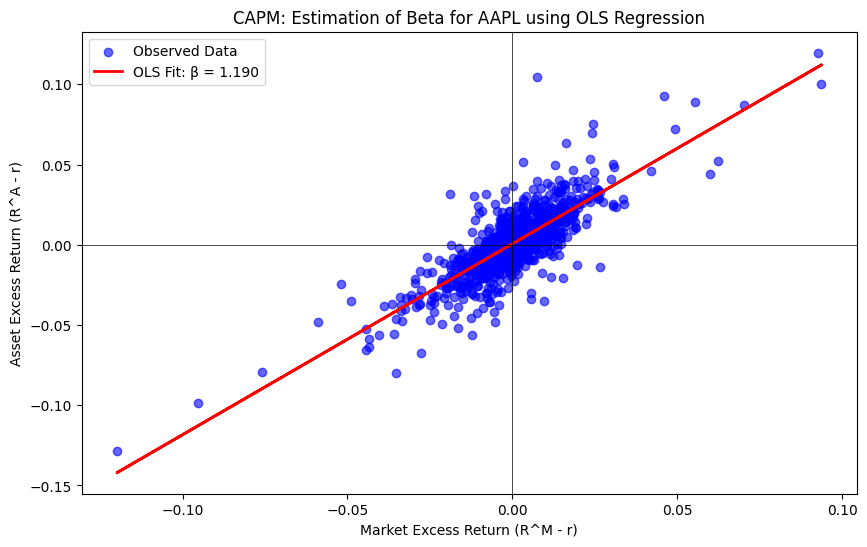

Estimated Beta (β*): 1.1897
Covariance of Beta Estimate: 0.000709


In [11]:
# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Observed Data", color="blue", alpha=0.6)
plt.plot(x, Y_pred, label=f"OLS Fit: β = {beta_hat:.3f}", color="red", linewidth=2)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel("Market Excess Return (R^M - r)")
plt.ylabel("Asset Excess Return (R^A - r)")
plt.legend()
plt.title(f"CAPM: Estimation of Beta for {ticker_asset} using OLS Regression")
plt.show()

# Print results
print(f"Estimated Beta (β*): {beta_hat:.4f}")
print(f"Covariance of Beta Estimate: {cov_beta_hat:.6f}")


## Optimization with Equality Constraints:

### Lagrange method:


With linear constrainsts, the optimization problem becomes:

$$ \min\limits_{x_1,..., x_n} f(x_1,..., x_n) $$

subject to: 
\begin{aligned}
g_1(x_1, \dots, x_n) &= b_1 \\
&\vdots \\
g_m(x_1, \dots, x_n) &= b_m
\end{aligned}

Obviously, Standard Calculus cannot be used to solve our minimization. But we will try to get back to this situation using `Lagrange Method`.

We will thus form the Lagrangian function: $L(x,\lambda)$
Using the term previously defined L is our objective function equal to f augmented by the addition of the constraint functions multiplied by a variable (Lagrange multiplier).

$$L(x,\lambda)=f(x) + \sum_{i=1}^{m} \lambda_j(g_j(x)-b_j)$$

The lagrange function transform a n variable + m constraints problem into an unconstrained optimization with n + m variables $(x_1, \dots, x_n,\lambda_1, \dots, \lambda_n)$

With then repeat the same process on: $$\min\limits_{x,\lambda} L(x,\lambda)$$


Firstly the gradient changes as:

$$
\frac{\partial L}{\partial x_i} = \frac{\partial f}{\partial x_i} + \sum_{i=1}^{m} \lambda_j(\frac{\partial g_j}{\partial x_i})
\tag{1}$$

$$
\frac{\partial L}{\partial \lambda_i} = g_j(x) - b_j \tag{2}$$

(1) is n equations corresponding to an unconstrained optimization pb avec f penalized by a sum of functions parameterized by $\lambda$
(2) represents m equations but they are our constraints

Once the system of n + m equations is solved, we only need to look at the Hessian before finishing. By the way mathematically speaking checking the Hessian is not enough in most of optimization problems but here it is sufficient.

### Application to portfolio selection:

Portfolio selection problem is generally defined as minimization of risk subject to a return constraint. This is because of 2 main reasons:

- risks are way easier to control than returns
- a return objective is more intuitive than a risk objective


Our objective function is thus portfolio variance and we will minimize it with respects to portfolio weights. 
$$\min\limits_{w} \sigma_{\pi}^2 = w^T\Sigma w$$
We often multiply this eqation by $\frac{1}{2}$ because as we've seen we will derivate $w^T\Sigma w$ that makes a 2 pop. So we do this trick just for scaling.

Our constraints are:
- Portfolio's return must be equal to m (later we will see we can here use an inequality)
$$\mu_{\pi} = \mu^Tw=m$$
- Weights constraint call bugdet equation: the sum of the weights must be equal to 1, on a first approach we will have no risk free asset.
$$\mathbf{1}^Tw = 1$$


Using Lagrange method and its function we can write using two Lagrange multipliers $\lambda$ and $\gamma$ as there are 2 constraints:
$$L(w,\lambda,\gamma) = \frac{1}{2}w^T\Sigma w + \lambda(m - \mu^Tw) + \gamma(1-\mathbf{1}^Tw)$$

Let's use H1 and calculate the gradient equaling it to 0:
$$\frac{\partial L}{\partial \lambda} (w,\lambda,\gamma) = \Sigma w - \lambda \mu - \gamma \mathbf{1} = 0$$

As the Hessian is equal to the covariance matrix $\Sigma$ which is positive definite we have reached an optimal vector $w^*$:
$$w^*= \Sigma^{-1}(\lambda \mu + \gamma \mathbf{1})$$

Now we have to find $\lambda$ and $\gamma$, we will use our new expresion of $w^*$ in our constraints:
$$
\begin{cases} 
\lambda \mu^T\Sigma^{-1}\mu+ \gamma \mu^T\Sigma^{-1}\mathbf{1} = m \\ 
\lambda \mathbf{1}^T\Sigma^{-1}\mu + \gamma \mathbf{1}^T\Sigma^{-1}\mathbf{1} = 1
\end{cases}$$
or
$$
\begin{cases} 
\lambda C+ \gamma B = m \\ 
\lambda B + \gamma A = 1
\end{cases}$$
Then
$$
\begin{cases} 
\lambda =\frac{Am-B}{AC-B^2}\\ 
\gamma =\frac{C-Bm}{AC-B^2}
\end{cases}$$


We finally have:

$$w^* = \frac{1}{AC-B^2}\Sigma^{-1}[(A\mu-B\mathbf{1})m + (C\mathbf{1}-B\mu)]$$


#### Application in Python

In [7]:
# Let's chose m = 10 %

m=0.10

In [8]:
# data for 5 stocks
mu = np.array([0.05,0.07,0.15,0.27])
sigma = np.array([0.07,0.12,0.30,0.60])
Sigma = np.array([
    [0.0049, 0.00672, 0.0105, 0.0168],
    [0.00672, 0.0144, 0.0252, 0.036],
    [0.0105, 0.0252, 0.09, 0.144],
    [0.0168, 0.036, 0.144, 0.36]
])
ones = np.array([1,1,1,1])
Sigma_inv = np.linalg.inv(Sigma)


In [9]:
#let's compute A,B,C
A = ones.T @ Sigma_inv @ ones
B = mu.T @ Sigma_inv @ ones
C = mu.T @ Sigma_inv @ mu

In [10]:
C

np.float64(0.5502809819580009)

In [11]:
lamb = (A*m-B)/(A*C-B**2)
gamma = (C-B*m)/(A*C-B**2)
w = Sigma_inv @ (lamb*mu + gamma*ones)

In [12]:
print(w)

[0.52841211 0.17288808 0.15976434 0.13893547]


In [29]:
#lets tests for different value and plot it:

m_values = np.linspace(0.10, 0.50, 5)  # Testing different expected returns
weights = []


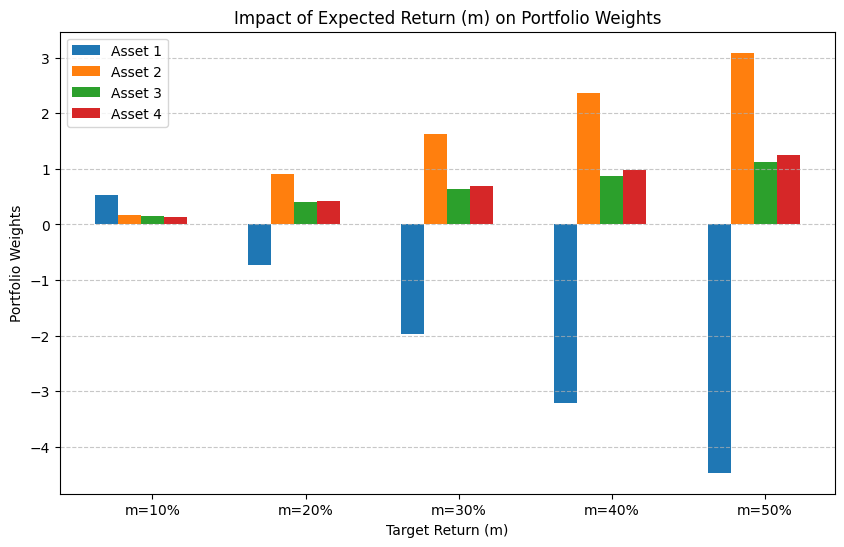

In [30]:
# Compute weights for each m
for m in m_values:
    lamb = (A * m - B) / (A * C - B**2)
    gamma = (C - B * m) / (A * C - B**2)
    w = Sigma_inv @ (lamb * mu + gamma * ones)
    weights.append(w)

# Convert to NumPy array for easier plotting
weights = np.array(weights)


# Création du graphique en barres groupées
bar_width = 0.15  # Largeur des barres
x_indexes = np.arange(len(m_values))  # Indices des groupes de barres

plt.figure(figsize=(10, 6))

# Tracer les barres pour chaque actif
for i in range(len(mu)):
    plt.bar(x_indexes + i * bar_width, weights[:, i], width=bar_width, label=f'Asset {i+1}')

# Configurer l'axe X
plt.xticks(x_indexes + bar_width * (len(mu) / 2), [f"m={m*100:.0f}%" for m in m_values])

# Ajout des labels et titre
plt.xlabel("Target Return (m)")
plt.ylabel("Portfolio Weights")
plt.title("Impact of Expected Return (m) on Portfolio Weights")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()

## Potential Continuation of This Project

We could explore Black-Litterman Models, which are also used for portfolio optimization. This model adjusts asset allocations derived from mean-variance optimization by incorporating investor views.

It is also worth mentioning that for optimization problems with inequality constraints, the Kuhn-Tucker Theorem provides a set of conditions for the existence of an optimal solution for such problems.